# Coding Session 4 - Basics of PyTorch.


In this coding session, we will get some basic practice with PyTorch. PyTorch a very popular library for implementing deep learning models. A critical aspect of PyTorch's functionality is the fact that it supports efficient execution on GPUs, but we will not be using GPUs in this coding session. The code we'll use is heavily borrowed from the [Machine Learning with PyTorch and Scikit-learn book's Github repo](https://github.com/rasbt/machine-learning-book/tree/main).

First, we need to install PyTorch. Run the following code from command line:

`pip3 install torch torch-vision`

Once this has run, the following code should execute on your computer.

In [1]:
import torch

PyTorch, as any deep learning library, works with *tensors*. Tensors generalize scalars, vectors, and matrices. In particular, each of these objects can be thought of as a map from a product of vector spaces to the real numbers. For example, every vector $v \in \mathbb{R}^d$ can be associated to a unique linear map from $\mathbb{R}^d \to \mathbb{R}$ via $x \mapsto v^T x$. And a matrix $M \in \mathbb{R}^{m \times n}$ can be associated to the unique bi-linear (this means it is linear in each argument separately) map from $\mathbb{R}^m \times \mathbb{R}^n \to \mathbb{R}$ which takes $(x, y) \mapsto y^T Mx$.

More abstractly, given a product of vector spaces $V := V_1 \times V_2 \times \cdots \times V_K$, we say a map $T \colon V \to W$ where $W$ is another vector space is *multi-linear* if for all choices of $k \in [K]$ and fixed
$$
v_1 \in V_1, v_2 \in V_2, \ldots v_{k - 1} \in V_{k - 1}, v_{k + 1} \in V_{k + 1},\ldots,
v_K \in V_K,
$$ the map which takes
$$
v \in V_k \mapsto T(v_1, \ldots, v_{k - 1}, v, v_{k + 1}, \ldots, v_K)
$$ is linear. Tensors are just another name for multi-linear maps, and the integer $K$ is known as the *rank* of the tensor.

Multi-linear maps/tensors arise naturally in multivariable calculus, differential geometry, physics and many other areas. In machine learning, they are not described in such an abstract way but they arise just as naturally, being a clean way of thinking about multi-dimensional arrays. The indices of each of these arrays generally look like `[data set index, feature index 1, feature index 2, ...]`; for example in convolutional neural networks the first feature index indicates the data dimension, and the second feature index indicates the channel (RGB).

Let's start by creating and manipulating some tensors in PyTorch.

In [2]:
import numpy as np

a = [1, 2, 3]
b = np.array([4, 5, 6], dtype=np.int32)

t_a = torch.tensor(a)
t_b = torch.from_numpy(b)

print(t_a)
print(t_b)

tensor([1, 2, 3])
tensor([4, 5, 6], dtype=torch.int32)


We can check if objects are torch tensors via

In [3]:
torch.is_tensor(a), torch.is_tensor(t_a)

(False, True)

Similar to NumPy we can make all-ones tensors with the following.

In [4]:
t_ones = torch.ones(2, 3)
print(t_ones)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


Think about what the following should return before you run the code

In [5]:
print(torch.sum(torch.ones(2, 3, 4)))

tensor(24.)


We can also manipulate tensors in the following way (should be recognizable if you are familiar with NumPy)

In [6]:
t = torch.rand(3, 5)

# observe carefully that when we work with tensors we need to
# specify the axes that we perform the transpose on
t_tr = torch.transpose(t, 0, 1)
print(t.shape, ' --> ', t_tr.shape)

torch.Size([3, 5])  -->  torch.Size([5, 3])


In [7]:
t = torch.zeros(30)

t_reshape = t.reshape(5, 6)

print(t_reshape.shape)

torch.Size([5, 6])


It's also often helpful to get rid of extraneous axes using the squeeze functionality

In [8]:
t = torch.zeros(1, 2, 1, 4, 1)

t_sqz = torch.squeeze(t, 2)

print(t.shape, ' --> ', t_sqz.shape)

torch.Size([1, 2, 1, 4, 1])  -->  torch.Size([1, 2, 4, 1])


It is very important that we understand how to use the basic mathematical operations on tensors. The following code executes element-wise multiplication, summing along an axis, matrix multiplication, and norms

In [9]:
torch.manual_seed(1)

t1 = 2 * torch.rand(5, 2) - 1
t2 = torch.normal(mean=0, std=1, size=(5, 2))

t3 = torch.multiply(t1, t2)
print(t3)

tensor([[ 0.4426, -0.3114],
        [ 0.0660, -0.5970],
        [ 1.1249,  0.0150],
        [ 0.1569,  0.7107],
        [-0.0451, -0.0352]])


In [10]:
t4 = torch.mean(t1, axis=0)
print(t4)

tensor([-0.1373,  0.2028])


In [11]:
t5 = torch.matmul(t1, torch.transpose(t2, 0, 1))
print(t5)

tensor([[ 0.1312,  0.3860, -0.6267, -1.0096, -0.2943],
        [ 0.1647, -0.5310,  0.2434,  0.8035,  0.1980],
        [-0.3855, -0.4422,  1.1399,  1.5558,  0.4781],
        [ 0.1822, -0.5771,  0.2585,  0.8676,  0.2132],
        [ 0.0330,  0.1084, -0.1692, -0.2771, -0.0804]])


In [12]:
t6 = torch.matmul(torch.transpose(t1, 0, 1), t2)
print(t6)

tensor([[ 1.7453,  0.3392],
        [-1.6038, -0.2180]])


In [13]:
norm_t1 = torch.linalg.norm(t1, ord=2)
print(norm_t1)

tensor(1.4696)


**Module for managing your datasets** PyTorch offers a convenient module for loading and batching your dataset.

In [14]:
from torch.utils.data import DataLoader

t = torch.arange(6, dtype=torch.float32)
data_loader = DataLoader(t)

for item in data_loader:
    print(item)

tensor([0.])
tensor([1.])
tensor([2.])
tensor([3.])
tensor([4.])
tensor([5.])


We can also batch this dataset as

In [15]:
data_loader = DataLoader(t, batch_size=3, drop_last=False)

for i, batch in enumerate(data_loader, 1):
    print(f'batch {i}:', batch)

batch 1: tensor([0., 1., 2.])
batch 2: tensor([3., 4., 5.])


**Training a linear regression model** Let's build up to implementing a deep learning model in PyTorch by implementing a linear regression model on some synthetic data. Here's the synthetic data we'll use:

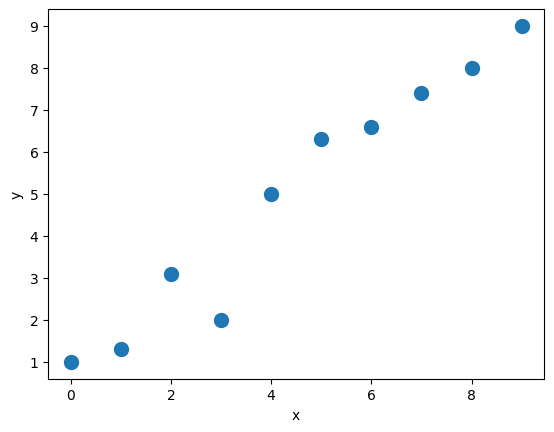

In [16]:
import matplotlib.pyplot as plt

X_train = np.arange(10, dtype='float32').reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 
                    7.4, 8.0, 9.0], dtype='float32')

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('figures/12_07.pdf')
plt.show()

Let's do our usual pre-processing step of centering and normalizing the features of the data.

In [17]:
from torch.utils.data import TensorDataset

X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)

y_train = torch.from_numpy(y_train).float()

train_ds = TensorDataset(X_train_norm, y_train)

batch_size = 1
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

Now, let's implement our actual linear regression model. We'll see the reason for some of this code later, so don't expect to understand it 100% now. First, we'll initialize the weights and define the model (affine map) and loss function (MSE).

In [18]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)
 
def loss_fn(input, target):
    return (input-target).pow(2).mean()

def model(xb):
    return xb @ weight + bias


Then, we'll set the learning rate and iterate over the batches in the training dataset. Observe carefully how we use the `loss.backward()` call to compute the gradients and then use the gradients and the learning rates to update, we'll comment on this more below.

In [19]:
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss.backward()

        with torch.no_grad():
            weight -= weight.grad * learning_rate
            bias -= bias.grad * learning_rate
            weight.grad.zero_()
            bias.grad.zero_()
 
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 45.0782
Epoch 10  Loss 26.4366
Epoch 20  Loss 1.5918
Epoch 30  Loss 14.1307
Epoch 40  Loss 11.6038
Epoch 50  Loss 6.3084
Epoch 60  Loss 0.6349
Epoch 70  Loss 3.1374
Epoch 80  Loss 1.9999
Epoch 90  Loss 0.3133
Epoch 100  Loss 0.7653
Epoch 110  Loss 1.0039
Epoch 120  Loss 0.0235
Epoch 130  Loss 0.5176
Epoch 140  Loss 0.0759
Epoch 150  Loss 1.8789
Epoch 160  Loss 0.0008
Epoch 170  Loss 0.0866
Epoch 180  Loss 0.0646
Epoch 190  Loss 0.0011


Let's check the final parameters and evaluate the model on a synthetic "test" dataset.

Final Parameters: 2.6696107387542725 4.879678249359131


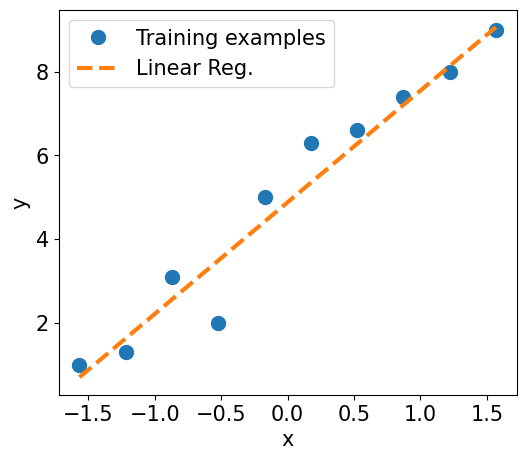

In [20]:
print('Final Parameters:', weight.item(), bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
 
#plt.savefig('figures/12_08.pdf')

plt.show()

**The PyTorch neural networks module.** The `torch.nn` module is a powerful module for implementing neural networks. The following code does the same thing as above but with torch.nn objects.

In [21]:
import torch.nn as nn

input_size = 1
output_size = 1

# This is the torch.nn analog of our model method
model = nn.Linear(input_size, output_size)

# This is the torch.nn analog of our loss_fn method
loss_fn = nn.MSELoss(reduction='mean')

# This sets up the SGD optimization
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        # 1. Generate predictions
        pred = model(x_batch)[:, 0] 

        # 2. Calculate loss
        loss = loss_fn(pred, y_batch)

        # 3. Compute gradients
        loss.backward()

        # 4. Update parameters using gradients
        optimizer.step()

        # 5. Reset the gradients to zero
        optimizer.zero_grad()
        
    if epoch % log_epochs==0:
        print(f'Epoch {epoch}  Loss {loss.item():.4f}')

Epoch 0  Loss 24.6684
Epoch 10  Loss 29.1377
Epoch 20  Loss 20.9207
Epoch 30  Loss 0.1257
Epoch 40  Loss 12.4922
Epoch 50  Loss 1.7845
Epoch 60  Loss 7.6425
Epoch 70  Loss 2.5606
Epoch 80  Loss 0.0157
Epoch 90  Loss 0.7548
Epoch 100  Loss 0.8412
Epoch 110  Loss 0.4923
Epoch 120  Loss 0.0823
Epoch 130  Loss 0.0794
Epoch 140  Loss 0.0891
Epoch 150  Loss 0.0973
Epoch 160  Loss 0.1043
Epoch 170  Loss 0.1103
Epoch 180  Loss 0.0009
Epoch 190  Loss 0.0764


Let's look at our final parameters and "test" performance.

Final Parameters: 2.6496422290802 4.87706995010376


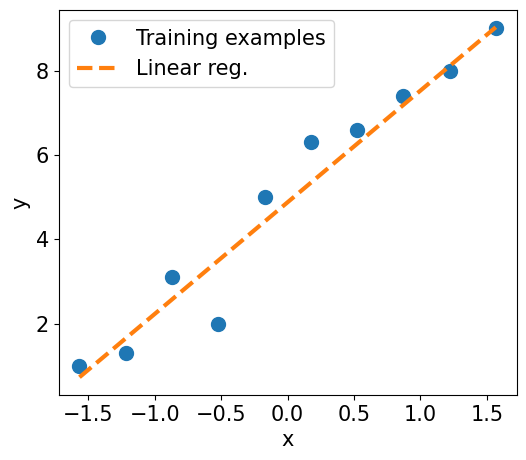

In [22]:
print('Final Parameters:', model.weight.item(), model.bias.item())
 
X_test = np.linspace(0, 9, num=100, dtype='float32').reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm.detach().numpy(), y_train.detach().numpy(), 'o', markersize=10)
plt.plot(X_test_norm.detach().numpy(), y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

**Finally, applying `torch.nn` to an actual neural network.** It should now be straightforward to apply `torch.nn` to build basic two layer perceptron for the Iris datset.

In [23]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split 

iris = load_iris()
X = iris['data']
y = iris['target']
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1./3, random_state=1)

In [24]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm).float()
y_train = torch.from_numpy(y_train)

train_ds = TensorDataset(X_train_norm, y_train)

torch.manual_seed(1)
batch_size = 2
train_dl = DataLoader(train_ds, batch_size, shuffle=True)

The following code specifies our model as a two-layer perceptron with a sigmoid hidden layer and softmax output layer.

In [25]:
class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        x = self.layer2(x)
        x = nn.Softmax(dim=1)(x)
        return x

input_size = X_train_norm.shape[1]
hidden_size = 16
output_size = 3
 
model = Model(input_size, hidden_size, output_size)

learning_rate = 0.001

We'll use the cross-entropy loss, and the Adam optimization algorithm which is an augmented form of SGD (both of which we will unfortunately not have the time to get into).

In [26]:
loss_fn = nn.CrossEntropyLoss()
 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [27]:
num_epochs = 100
loss_hist = [0] * num_epochs
accuracy_hist = [0] * num_epochs

for epoch in range(num_epochs):

    for x_batch, y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch.long())
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    
        loss_hist[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist[epoch] += is_correct.sum()
        
    loss_hist[epoch] /= len(train_dl.dataset)
    accuracy_hist[epoch] /= len(train_dl.dataset)

Let's look at the train performance over the optimization trajectory.

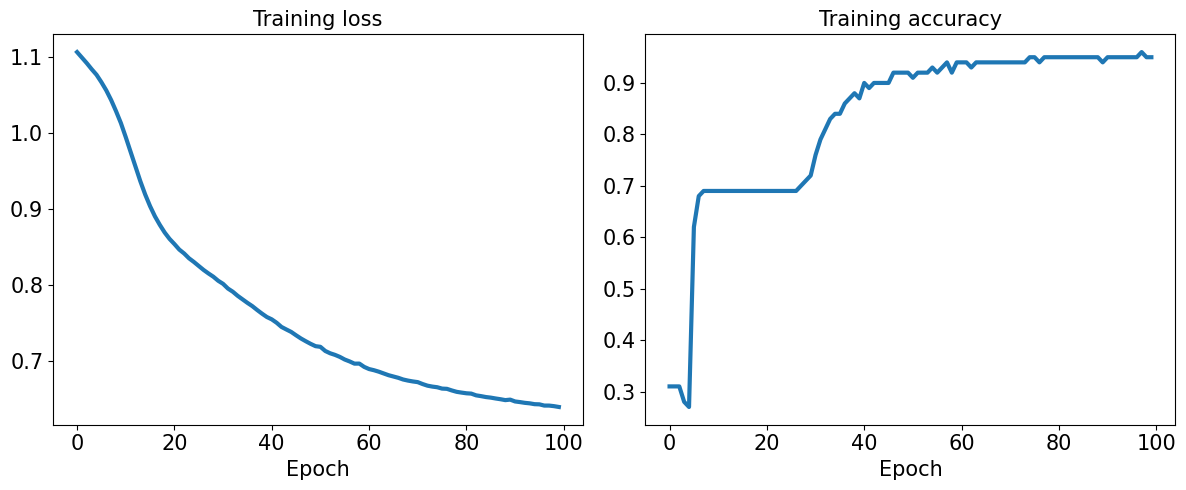

In [28]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(loss_hist, lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(accuracy_hist, lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()

#plt.savefig('figures/12_09.pdf')
 
plt.show()

And look at test performance

In [29]:
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)
X_test_norm = torch.from_numpy(X_test_norm).float()
y_test = torch.from_numpy(y_test) 
pred_test = model(X_test_norm)

correct = (torch.argmax(pred_test, dim=1) == y_test).float()
accuracy = correct.mean()
 
print(f'Test Acc.: {accuracy:.4f}')

Test Acc.: 0.9800
